In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

from plotnine import *

task_data = pd.read_csv('../data/human/all_data/all_data.csv')

task_averages = task_data.groupby(['task', 'dataset', 'model', 'topic_idx'])[["scores_raw"]].mean().reset_index()



Bad key "backend in file /Users/pranavgoel/.matplotlib/matplotlibrc, line 1 ('"backend: TkAgg"')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
task_data_auto = task_data.drop(columns="scores_raw").rename(columns={"c_npmi_10_full": "scores_raw"}).copy()
task_data_auto["task"] = "Automated"
task_data_auto["confidences_raw"] = 1
task_data_plot = pd.concat([task_data, task_data_auto], ignore_index=True)
task_data_plot = task_data_plot.replace("intrusions", "Intrusion")
task_data_plot = task_data_plot.replace("ratings", "Ratings")

In [3]:
task_averages = task_data_plot.groupby(['task', 'dataset', 'model', 'topic_idx'], sort=False)[["scores_raw"]].mean().reset_index()
task_averages['model'] = task_averages['model'].replace("mallet", "G-LDA")
task_averages['model'] = task_averages['model'].replace("dvae", "D-VAE")
task_averages['model'] = task_averages['model'].replace("etm", "ETM")

## Boxplot

In [4]:
task_averages['dataset'] = task_averages['dataset'].replace("nytimes", "NYT")
task_averages['dataset'] = task_averages['dataset'].replace("wikitext", "WIKI")

In [14]:
def col_func(s):
    if s=='NYT' or s=='WIKI':
        return ''
    else:
        return s

ggsave(
    ggplot(task_averages)
    + geom_boxplot(aes(x="factor(model)", y="scores_raw", fill='model'), show_legend = False)
    + facet_wrap("~dataset+task", scales="free_y", labeller = labeller(cols=col_func))
    + xlab("Model")
    + ylab("")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=6, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=8),
        axis_text_x=element_text(colour="black", size=5.5),
        axis_text_y=element_text(colour="black", size=5.5),
        subplots_adjust={'wspace': 0.3, 'hspace': 0.4},
        strip_margin_x=0.3,
    )
    + scale_x_discrete(limits=('G-LDA', 'D-VAE', 'ETM'))
    + theme(figure_size=(3.3, 2.2))
    + scale_fill_brewer(type="qual", palette="Set2"), filename="model_comparison_boxplot_small.pdf", dpi=320)

/Users/pranavgoel/anaconda/envs/pg/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3.3 x 2.2 in image.
/Users/pranavgoel/anaconda/envs/pg/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: model_comparison_boxplot_small.pdf


In [23]:
plot1 = (ggplot(task_averages)
    + geom_boxplot(aes(x="factor(model)", y="scores_raw", fill='model'), show_legend = False)
    + facet_wrap("~dataset+task", scales="free_y", )
    + xlab("Model")
    + ylab("")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=12, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=10),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=8),
        subplots_adjust={'wspace': 0.3, 'hspace': 0.5},
        strip_margin_x=0.3,
    )
    + scale_x_discrete(limits=('G-LDA', 'D-VAE', 'ETM'))
    + theme(figure_size=(6, 2.5))
    + scale_fill_brewer(type="qual", palette="Set2"))

### data setup for bar chart

In [15]:
task_data = pd.read_csv('../data/human/all_data/all_data.csv')
task_data = task_data.replace("intrusions", "Intrusion")
task_data = task_data.replace("ratings", "Ratings")

task_data_conf = task_data[task_data['confidences_raw']==1]
task_data_intrusion_filtered = task_data_conf[task_data_conf['task']=="Intrusion"]
task_data_intrusion_filtered["task"] = "Intrusion_filtered"

task_data_ratings_filtered = task_data_conf[task_data_conf['task']=="Ratings"]
task_data_ratings_filtered["task"] = "Ratings_filtered"

# task_data_auto = task_data.drop(columns="scores_raw").rename(columns={"c_npmi_10_full": "scores_raw"}).copy()
# task_data_auto["task"] = "Automated"
# task_data_auto["confidences_raw"] = 1


task_data_plot = pd.concat([task_data, task_data_intrusion_filtered, task_data_ratings_filtered], 
                           ignore_index=True)

#task_averages = task_data_plot.groupby(['task', 'dataset', 'model', 'topic_idx'], sort=False)[["scores_raw"]].mean().reset_index()

task_data_plot['subtask'] = task_data_plot['task'].copy()
task_data_plot['task'] = task_data_plot['task'].replace("Intrusion_filtered", "Intrusion")
task_data_plot['task'] = task_data_plot['task'].replace("Ratings_filtered", "Ratings")

task_data_plot['subtask'] = task_data_plot['subtask'].replace("Ratings_filtered", "Ratings: Filtered")
task_data_plot['subtask'] = task_data_plot['subtask'].replace("Ratings", "Ratings: All")
task_data_plot['subtask'] = task_data_plot['subtask'].replace("Intrusion_filtered", "Intrusion: Filtered")
task_data_plot['subtask'] = task_data_plot['subtask'].replace("Intrusion", "Intrusion: All")

task_data_plot['model'] = task_data_plot['model'].replace("mallet", "G-LDA")
task_data_plot['model'] = task_data_plot['model'].replace("dvae", "D-VAE")
task_data_plot['model'] = task_data_plot['model'].replace("etm", "ETM")

task_data_plot = task_data_plot.rename(columns={"subtask": "Familiarity"})

task_filtered_vs_og = task_data_plot.groupby(['task', 'dataset', 'Familiarity', 'model', 'topic_idx'], sort=False)[["scores_raw"]].mean().reset_index()

task_filtered_vs_og['dataset'] = task_filtered_vs_og['dataset'].replace("nytimes", "NYT")
task_filtered_vs_og['dataset'] = task_filtered_vs_og['dataset'].replace("wikitext", "WIKI")

<ipython-input-15-089f0fe1af95>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-089f0fe1af95>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
def col_func(s):
    if s=='NYT' or s=='WIKI':
        return ''
    else:
        return s

ggsave(
    ggplot(task_filtered_vs_og, aes(x='factor(model)', y='scores_raw', fill = 'model+Familiarity', color = 'Familiarity'))
    + geom_col(stat='summary', fun_y= lambda x:np.mean(x), position='dodge', width=0.5, show_legend=True)
    + facet_wrap("~dataset+task", scales="free_y", ncol = 2, labeller = labeller(cols=col_func))
    + xlab("Model")
    + ylab("")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=6, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=8),
        axis_text_x=element_text(colour="black", size=5.5),
        axis_text_y=element_text(colour="black", size=5.5),
        subplots_adjust={'wspace': 0.15, 'hspace': 0.4},
        strip_margin_x=0.3,
    )
    #CLOSE to working code for errorbar+ geom_errorbar(aes(ymin = task_filtered_vs_og.scores_raw.mean()-task_filtered_vs_og.scores_raw.std(), ymax = task_filtered_vs_og.scores_raw.mean()+task_filtered_vs_og.scores_raw.std()), width = 0.25, data = None)
    #uncomment to remove legend title + theme(legend_title=element_blank())
    #This should work but doesn't do anything + theme(legend_key=element_rect(fill='pink'))
    + scale_x_discrete(limits=('G-LDA', 'D-VAE', 'ETM'))#"G-LDA", "D-VAE", "ETM"))
    + theme(figure_size=(3.5, 2.2))
    + guides(fill = False) #turns off legend for fill
    #This should work for changing legend + guides(color = guide_legend(override.aes = list(fill = "white")))
    + scale_color_manual([ 'black', 'yellow', 'black', 'yellow',])
    + scale_fill_manual(values = ["#66c2a5", "#b2e0d2",
                                  "#66c2a5", "#b2e0d2",
                                  "#fc8d62", "#fdc6b0",
                                  "#fc8d62", "#fdc6b0",
                                  "#8da0cb", "#c6cfe5",
                                  "#8da0cb", "#c6cfe5", 
                                  "#66c2a5", "#b2e0d2",
                                  "#66c2a5", "#b2e0d2",
                                  "#fc8d62", "#fdc6b0", 
                                  "#fc8d62", "#fdc6b0",
                                  "#8da0cb", "#c6cfe5",
                                  "#8da0cb", "#c6cfe5"])#scale_fill_brewer(type="qual", palette="Set2")
, filename="barplot_effect_of_familiarity_small.pdf", dpi=320)

/Users/pranavgoel/anaconda/envs/pg/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3.5 x 2.2 in image.
/Users/pranavgoel/anaconda/envs/pg/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: barplot_effect_of_familiarity_small.pdf


In [24]:
plot2 = (
    ggplot(task_filtered_vs_og, aes(x='factor(model)', y='scores_raw', fill = 'model+Familiarity', color = 'Familiarity'))
    + geom_col(stat='summary', fun_y= lambda x:np.mean(x), position='dodge', width=0.5, show_legend=True)
    + facet_wrap("~dataset+task", scales="free_y", ncol = 2, )
    + xlab("Model")
    + ylab("")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=12, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=10),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=8),
        subplots_adjust={'wspace': 0.1, 'hspace': 0.4},
        strip_margin_x=0.3,
    )
    #CLOSE to working code for errorbar+ geom_errorbar(aes(ymin = task_filtered_vs_og.scores_raw.mean()-task_filtered_vs_og.scores_raw.std(), ymax = task_filtered_vs_og.scores_raw.mean()+task_filtered_vs_og.scores_raw.std()), width = 0.25, data = None)
    #uncomment to remove legend title + theme(legend_title=element_blank())
    #This should work but doesn't do anything + theme(legend_key=element_rect(fill='pink'))
    + scale_x_discrete(limits=('G-LDA', 'D-VAE', 'ETM'))#"G-LDA", "D-VAE", "ETM"))
    + theme(figure_size=(4.5, 2.5))
    + guides(fill = False) #turns off legend for fill
    #This should work for changing legend + guides(color = guide_legend(override.aes = list(fill = "white")))
    + scale_color_manual([ 'black', 'yellow', 'black', 'yellow',])
    + scale_fill_manual(values = ["#66c2a5", "#b2e0d2",
                                  "#66c2a5", "#b2e0d2",
                                  "#fc8d62", "#fdc6b0",
                                  "#fc8d62", "#fdc6b0",
                                  "#8da0cb", "#c6cfe5",
                                  "#8da0cb", "#c6cfe5", 
                                  "#66c2a5", "#b2e0d2",
                                  "#66c2a5", "#b2e0d2",
                                  "#fc8d62", "#fdc6b0", 
                                  "#fc8d62", "#fdc6b0",
                                  "#8da0cb", "#c6cfe5",
                                  "#8da0cb", "#c6cfe5"])#scale_fill_brewer(type="qual", palette="Set2")
)

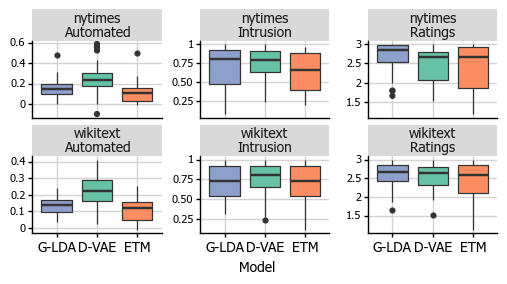

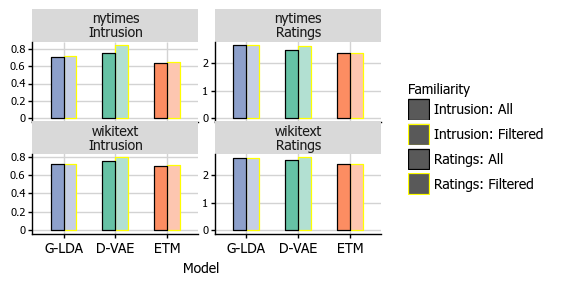

(<ggplot: (8767333515427)>, <ggplot: (8767345381771)>)


In [25]:
print((plot1, plot2))